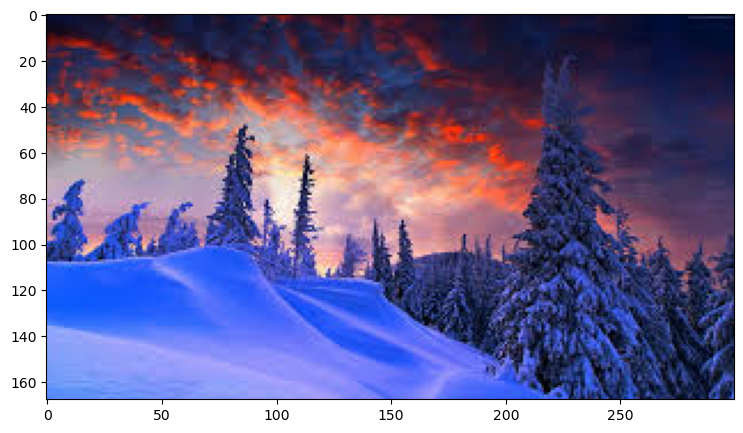

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
img = cv2.imread('C:/r_d/forest.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x227902df5e0>)

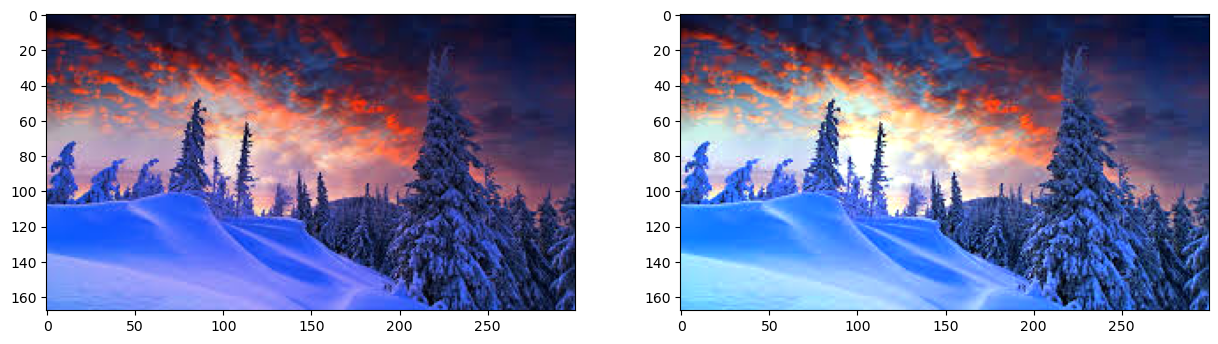

In [16]:
# Define white patch and the coefficients
img = cv2.imread('C:/r_d/forest.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
row, col = 92, 125
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x2279392daf0>)

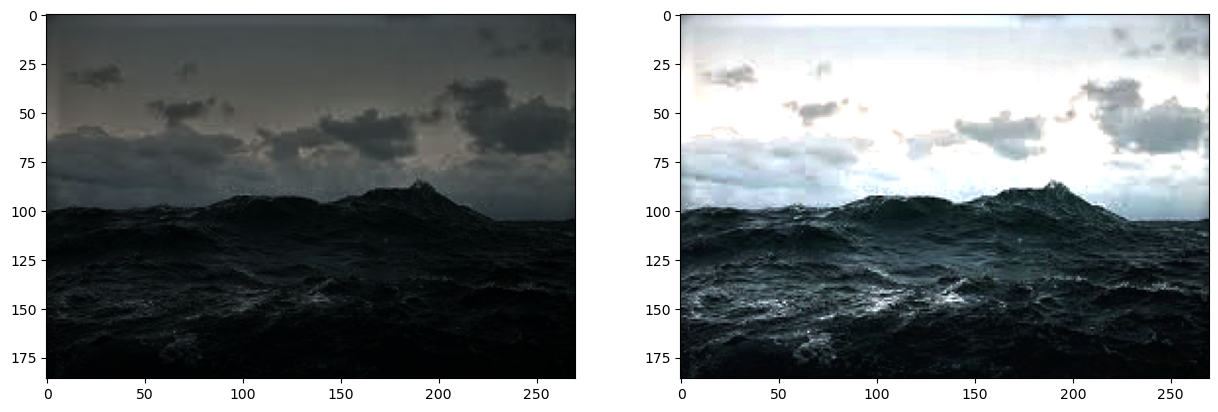

In [18]:
# White patch shows a better difference in this example
img = cv2.imread('C:/r_d/sea.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
row, col = 60, 140
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

0.35740943043884216 0.31644747899159664 0.522599361967009
1.462186829612581 1.651456866183114 1.0


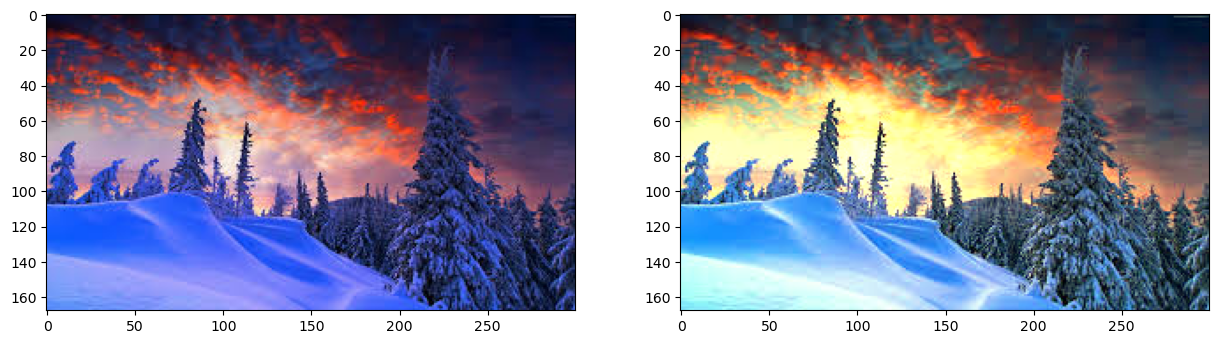

In [97]:
# Load your image
img = cv2.imread('C:/r_d/forest.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
red, green, blue = cv2.split(img)
mean_r = np.mean(red)/255
mean_g = np.mean(green)/255
mean_b = np.mean(blue)/255

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_b/mean_r
kg = mean_b/mean_g
kb = 1.0

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img[..., 0] * kr
balanced[..., 1] = img[..., 1] * kg
balanced[..., 2] = img[..., 2] * kb
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
print(mean_r, mean_g, mean_b)
print(kr, kg, kb)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x22791f8b2e0>)

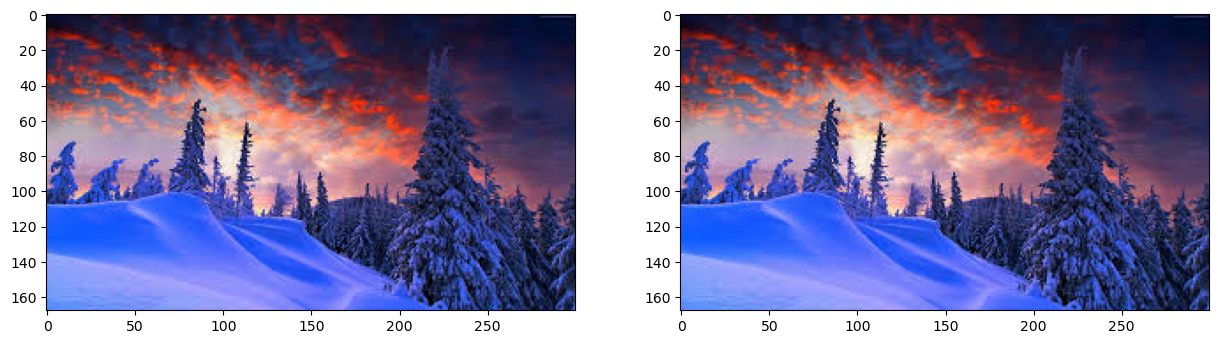

In [13]:
# Load your image
img = cv2.imread('C:/r_d/forest.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
red, green, blue = cv2.split(img)
max_r = np.max(red)/255
max_g = np.max(green)/255
max_b = np.max(blue)/255

# Apply scale-by-max balancing and generate the balanced image
balanced_r=red/max_r
balanced_g=green/max_g
balanced_b=blue/max_b
balanced = cv2.merge([balanced_r, balanced_g, balanced_b])
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x22793031fa0>)

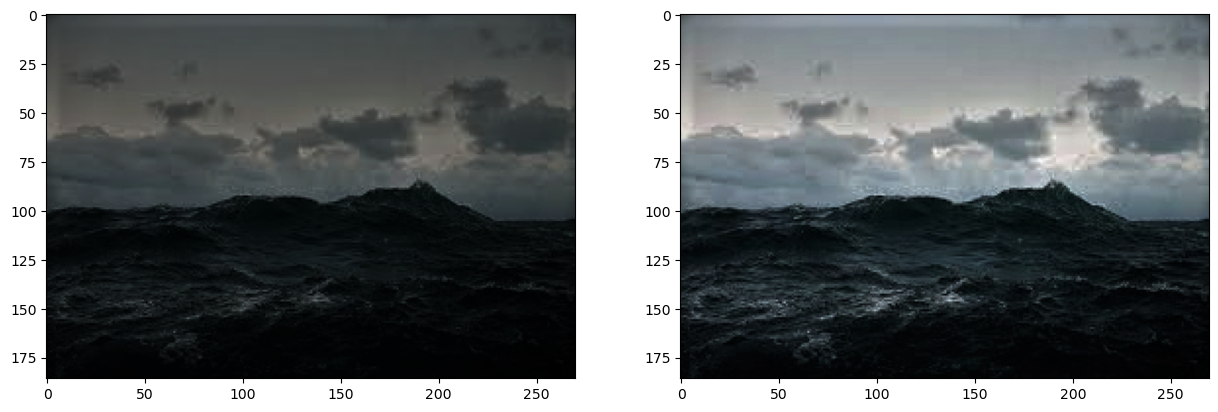

In [14]:
# Scale-by-max shows a better difference in this example

img = cv2.imread('C:/r_d/sea.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)
max_r = np.max(red)/255
max_g = np.max(green)/255
max_b = np.max(blue)/255

balanced_r=red/max_r
balanced_g=green/max_g
balanced_b=blue/max_b
balanced = cv2.merge([balanced_r, balanced_g, balanced_b])
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)